In [1]:
import sys
import os
sys.path.append('..')
from hijacobi import Spherically_Symmetric, reparam
from hijacobi.solver import bisection

import torch
import matplotlib.pyplot as plt

18:30:32|TQ-WARNING| Error enabling CUDA. cuda.is_available() returned False. CPU will be used.


In [2]:
# Задаём тестируемый объект

metric_f = lambda r: 1-2/r
BH0 = Spherically_Symmetric(metric_f)

Input impulse shape:  torch.Size([301, 251])
Computed uTh shape torch.Size([3, 301, 251])


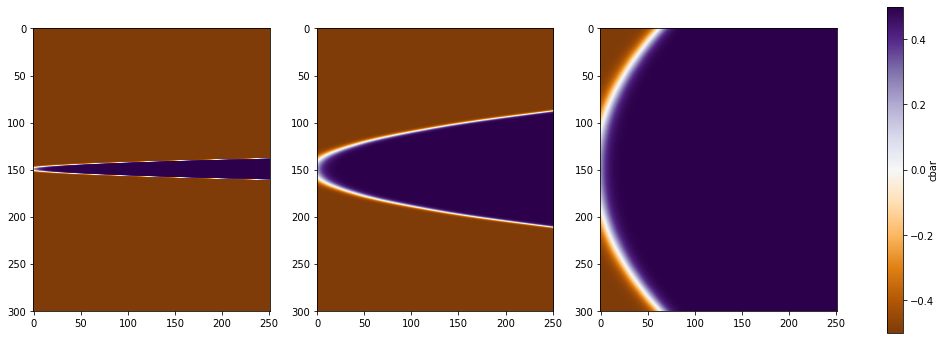

In [14]:
## Полярный потенциал
#  Определяем аргументы и сетку параметров
th_s = torch.Tensor([0.1, 0.5, 1.2])

l_s = torch.linspace(-3, 3, 301)
q_s = torch.linspace(0.1, 5.1, 251)

l_ik, q_ik = torch.meshgrid(l_s, q_s, indexing='ij')
uTh0 = BH0.uTh(th_s, l_ik, q_ik)

imUth0 = torch.sigmoid(10*uTh0)-0.5

print('Input impulse shape: ', l_ik.shape)
print('Computed uTh shape', uTh0.shape)

fig, ax = plt.subplots(1,3, figsize=(18, 6))
cmap='PuOr'
ax[0].imshow(imUth0[0], cmap='PuOr')
ax[1].imshow(imUth0[1], cmap='PuOr')
ax[2].imshow(imUth0[2], cmap='PuOr')

cbar = fig.colorbar(ax[0].imshow(imUth0[0], cmap=cmap), ax=ax.ravel().tolist(), orientation='vertical')
cbar.ax.set_ylabel('cbar', rotation=90, va='bottom')

plt.show()


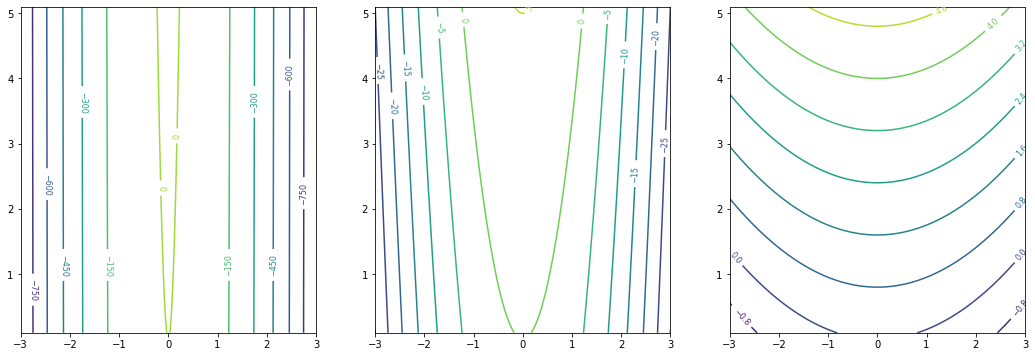

In [7]:
fig, ax = plt.subplots(1,3, figsize=(18, 6))

CS0 = ax[0].contour(l_ik, q_ik, uTh0[0])
ax[0].clabel(CS0, inline=True, fontsize=8)

CS1 = ax[1].contour(l_ik, q_ik, uTh0[1])
ax[1].clabel(CS1, inline=True, fontsize=8)

CS1 = ax[2].contour(l_ik, q_ik, uTh0[2])
ax[2].clabel(CS1, inline=True, fontsize=8)

plt.show()

Input impulse shape:  torch.Size([301, 251])
Computed uTh shape torch.Size([3, 301, 251])


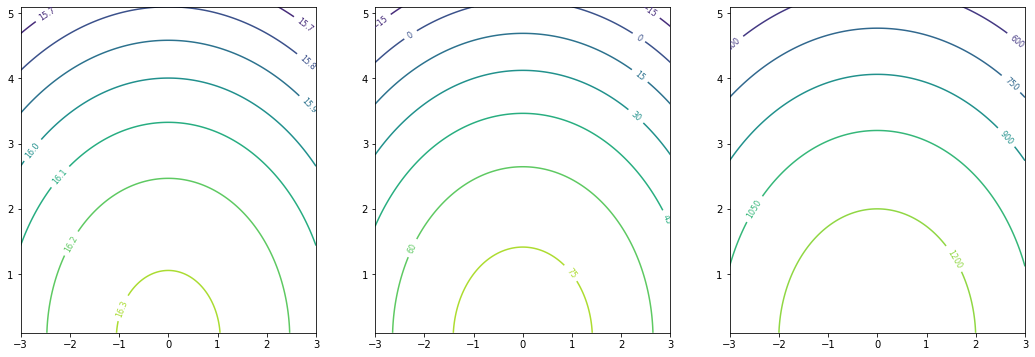

In [8]:
## Радиальный потенциал
# Определяем аргументы и сетку параметров
r_s = torch.Tensor([2.01, 3, 6])

l_s = torch.linspace(-3, 3, 301)
q_s = torch.linspace(0.1, 5.1, 251)

l_ik, q_ik = torch.meshgrid(l_s, q_s, indexing='ij')
uR0 = BH0.uR_(r_s, l_ik, q_ik)

imUR0 = torch.sigmoid(10*uR0)-0.5

print('Input impulse shape: ', l_ik.shape)
print('Computed uTh shape', uR0.shape)

fig, ax = plt.subplots(1,3, figsize=(18, 6))

CS0 = ax[0].contour(l_ik, q_ik, uR0[0])
ax[0].clabel(CS0, inline=True, fontsize=8)

CS1 = ax[1].contour(l_ik, q_ik, uR0[1])
ax[1].clabel(CS1, inline=True, fontsize=8)

CS2 = ax[2].contour(l_ik, q_ik, uR0[2]) 
ax[2].clabel(CS2, inline=True, fontsize=8)

plt.show()

In [32]:
Solver0 = reparam(BH0)
Solver0.Ir(torch.Tensor([2.1, 100]), l_ik, q_ik)

c:\Users\aleks\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


tensor([[0.5325, 0.5325, 0.5325,  ..., 0.6844, 0.6866, 0.6888],
        [0.5322, 0.5322, 0.5322,  ..., 0.6835, 0.6857, 0.6879],
        [0.5319, 0.5319, 0.5319,  ..., 0.6827, 0.6849, 0.6870],
        ...,
        [0.5319, 0.5319, 0.5319,  ..., 0.6827, 0.6849, 0.6870],
        [0.5322, 0.5322, 0.5322,  ..., 0.6835, 0.6857, 0.6879],
        [0.5325, 0.5325, 0.5325,  ..., 0.6844, 0.6866, 0.6888]])

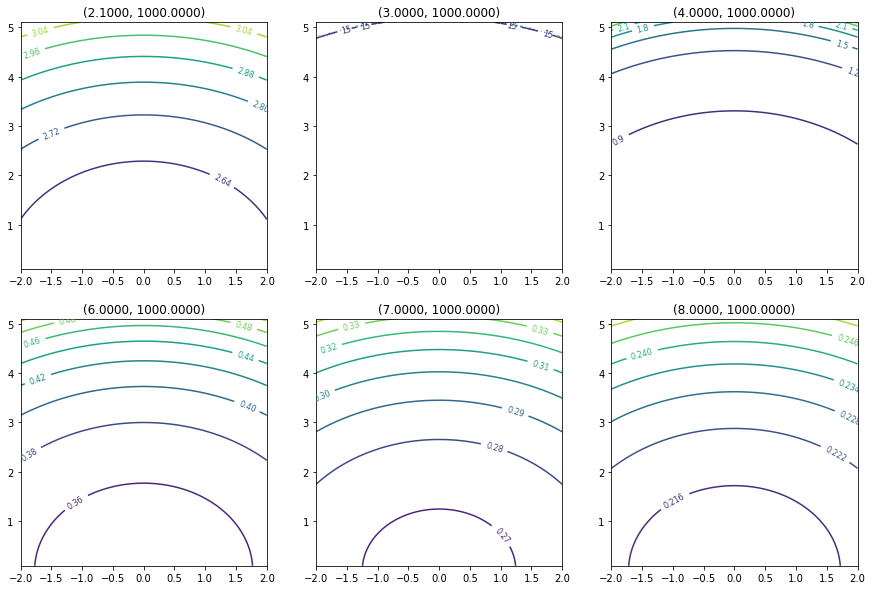

In [34]:
# Тестируем интеграл
eps = 0.05
r_s = [2.1, 3, 4, 6, 7, 8]
rlim_s = [torch.Tensor([r_, 1000]) for r_ in r_s]
l_s = torch.linspace(-2, 2, 201)
q_s = torch.linspace(0.1, 5.1, 251)

l_ik, q_ik = torch.meshgrid(l_s, q_s, indexing='ij')

fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for i, rlim in enumerate(rlim_s):
    ax[divmod(i, 3)].set_title('({:4.4f}, {:4.4f})'.format(rlim[0], rlim[1]))
    CS = ax[divmod(i, 3)].contour(l_ik, q_ik, Solver0.Ir(rlim, l_ik, q_ik))
    ax[divmod(i, 3)].clabel(CS, inline=True, fontsize=8)
    # ax[divmod(i, 3)].imshow(BH0.Ith(th, l_ik, q_ik))

plt.show()

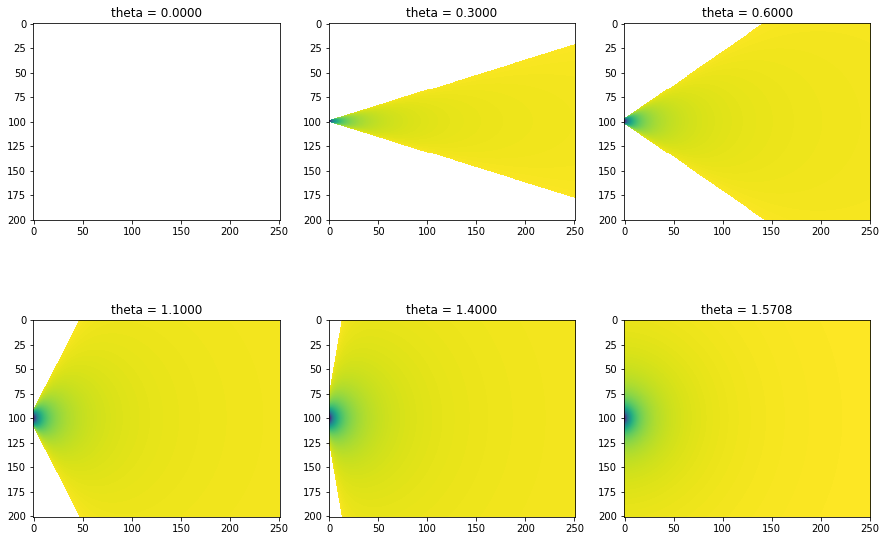

In [6]:
# Тестируем интеграл с точкой поворота:

th_s = torch.Tensor([0, 0.3, 0.6, 1.1, 1.4, torch.pi/2])

l_s = torch.linspace(-2, 2, 201)
q_s = torch.linspace(0.1, 5.1, 251)

l_ik, q_ik = torch.meshgrid(l_s, q_s, indexing='ij')

fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for i, th in enumerate(th_s):
    ax[divmod(i, 3)].set_title('theta = {:4.4f}'.format(th))
    ax[divmod(i, 3)].imshow(BH0.Ith_t(th, l_ik, q_ik))

plt.show()

In [12]:
## Ищем нули потенциала 



l_s = torch.linspace(-3, 3, 21)
q_s = torch.linspace(0.1, 5.1, 21)
par_s = torch.meshgrid(l_s, q_s, indexing='ij')
r_min = 2.01*torch.ones_like(par_s[0])
r_max = 100*torch.ones_like(par_s[0])

f = lambda r, par: BH0.uR(r, par_s[0], par)

r_turn = bisection(f, r_min, r_max, par_s[1], maxiter=10)

print(r_turn)

RuntimeError: The size of tensor a (21) must match the size of tensor b (0) at non-singleton dimension 1